In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("kirbs_data_8_faces_output.csv", index_col = 0)

In [4]:
"""
DEP

dysphoric = 0-11, 0-21, 2-12, 2-22, 3-11, 3-22, 4-21, 4-22
positive = 0-22, 1-12, 2-11, 3-21, 4-12
sad = 0-21, 1-11, 2-22, 3-22, 4-21
happy = 0-22, 1-12, 2-11, 3-21, 4-12
neutral = 0-11, 1-22, 2-12, 3-12, 4-11

-----------------------------------------------------------

ANX

angry = 0-11, 1-21, 2-12, 3-11, 4-22
happy = 0-22. 1-12, 2-11, 3-21, 4-12
"""

In [41]:
# kwargs = participant_num, sti_num, face_loc

def get_time(data, participant_num, sti_num, face_loc):

    loc2name = {11: 'abs_dwell_time_face11',
                12: 'abs_dwell_time_face12',
                21: 'abs_dwell_time_face21',
                22: 'abs_dwell_time_face22'}
    
    variable = data[(data['participant_num'] == participant_num) & (data['sti_num'] == sti_num)][loc2name[face_loc]]
                                                                                   
    return int(variable)

In [80]:
dep_result = {}
for i in data.participant_num.unique()[::-1]:
    dysphoric = [
        get_time(data, i, 0, 11),
        get_time(data, i, 0, 21),
        get_time(data, i, 2, 12),
        get_time(data, i, 2, 22),
        get_time(data, i, 3, 11),
        get_time(data, i, 3, 22),
        get_time(data, i, 4, 21),
        get_time(data, i, 4, 22),
                ]
    positive = [
        get_time(data, i, 0, 22),
        get_time(data, i, 1, 12),
        get_time(data, i, 2, 11),
        get_time(data, i, 3, 21),
        get_time(data, i, 4, 12),
    ]
    sad= [
        get_time(data, i, 0, 21),
        get_time(data, i, 1, 11),
        get_time(data, i, 2, 22),
        get_time(data, i, 3, 22),
        get_time(data, i, 4, 21),
    ]
    happy = positive
    neutral = [
        get_time(data, i, 0, 11),
        get_time(data, i, 1, 22),
        get_time(data, i, 2, 12),
        get_time(data, i, 3, 12),
        get_time(data, i, 4, 11),
    ]
    
    dep_result[7-i] = [sum(dysphoric), sum(positive), sum(sad), sum(happy), sum(neutral)]

In [81]:
dep_result

{0: [7328, 4328, 4156, 4328, 6102],
 1: [8547, 4731, 4625, 4731, 4586],
 2: [6356, 2903, 4301, 2903, 5968],
 3: [6076, 2511, 4368, 2511, 3937],
 4: [7753, 6792, 4911, 6792, 4698],
 5: [5037, 1920, 3800, 1920, 2860],
 6: [7629, 5087, 2637, 5087, 7496],
 7: [5910, 4079, 3819, 4079, 2893]}

In [ ]:
"""
DEP

dysphoric = 0-11, 0-21, 2-12, 2-22, 3-11, 3-22, 4-21, 4-22
positive = 0-22, 1-12, 2-11, 3-21, 4-12
sad = 0-21, 1-11, 2-22, 3-22, 4-21
happy = 0-22, 1-12, 2-11, 3-21, 4-12
neutral = 0-11, 1-22, 2-12, 3-12, 4-11

-----------------------------------------------------------

ANX

angry = 0-11, 1-21, 2-12, 3-11, 4-22
happy = 0-22. 1-12, 2-11, 3-21, 4-12
"""

In [55]:
anx_result = {}
for i in data.participant_num.unique():
    angry = [
        get_time(data, i, 0, 11),
        get_time(data, i, 1, 21),
        get_time(data, i, 2, 12),
        get_time(data, i, 3, 11),
        get_time(data, i, 4, 22),
    ]
    
    happy = [
        get_time(data, i, 0, 22),
        get_time(data, i, 1, 12),
        get_time(data, i, 2, 11),
        get_time(data, i, 3, 21),
        get_time(data, i, 4, 12),
    ]
    
    anx_result[i] = [angry, happy]

In [48]:
target = pd.read_csv('target.csv', index_col = 0)

In [72]:
target.reset_index(drop = True, inplace = True)

In [90]:
dysphoric = [i[0] for i in dep_result.values()]
positive = [i[1] for i in dep_result.values()]
sad = [i[2] for i in dep_result.values()]
happy = [i[3] for i in dep_result.values()]
neutral = [i[4] for i in dep_result.values()]
dep = list(target.dep)

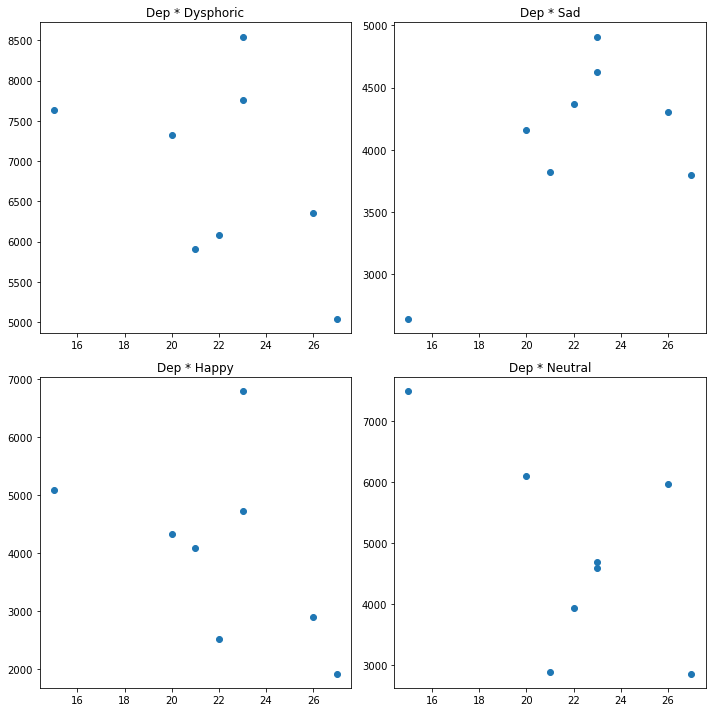

In [101]:
dysphoric = [i[0] for i in dep_result.values()]
positive = [i[1] for i in dep_result.values()]
sad = [i[2] for i in dep_result.values()]
happy = [i[3] for i in dep_result.values()]
neutral = [i[4] for i in dep_result.values()]
dep = list(target.dep)

fig, ax = plt.subplots(2, 2, figsize = (10,10))

ax[0, 0].scatter(dep, dysphoric)
ax[0, 1].scatter(dep, sad)
ax[1, 0].scatter(dep, happy)
ax[1, 1].scatter(dep, neutral)

ax[0, 0].set_title("Dep * Dysphoric")
ax[0, 1].set_title("Dep * Sad")
ax[1, 0].set_title("Dep * Happy")
ax[1, 1].set_title("Dep * Neutral")

fig.tight_layout()

plt.show()

In [106]:
# kwargs = participant_num, sti_num, face_loc

def get_ratio(data, participant_num, sti_num, face_loc):

    loc2name = {11: 'abs_dwell_time_face11',
                12: 'abs_dwell_time_face12',
                21: 'abs_dwell_time_face21',
                22: 'abs_dwell_time_face22'}
    
    variable = data[(data['participant_num'] == participant_num) & (data['sti_num'] == sti_num)][loc2name[face_loc]]
    time_sum = data[(data['participant_num'] == participant_num) & (data['sti_num'] == sti_num)].iloc[0, 2:].sum()
    
    return float(variable) / float(time_sum)

In [112]:
dep_result_ratio = {}
for i in data.participant_num.unique()[::-1]:
    dysphoric = [
        get_ratio(data, i, 0, 11),
        get_ratio(data, i, 0, 21),
        get_ratio(data, i, 2, 12),
        get_ratio(data, i, 2, 22),
        get_ratio(data, i, 3, 11),
        get_ratio(data, i, 3, 22),
        get_ratio(data, i, 4, 21),
        get_ratio(data, i, 4, 22),
                ]
    positive = [
        get_ratio(data, i, 0, 22),
        get_ratio(data, i, 1, 12),
        get_ratio(data, i, 2, 11),
        get_ratio(data, i, 3, 21),
        get_ratio(data, i, 4, 12),
    ]
    sad= [
        get_ratio(data, i, 0, 21),
        get_ratio(data, i, 1, 11),
        get_ratio(data, i, 2, 22),
        get_ratio(data, i, 3, 22),
        get_ratio(data, i, 4, 21),
    ]
    happy = positive
    neutral = [
        get_ratio(data, i, 0, 11),
        get_ratio(data, i, 1, 22),
        get_ratio(data, i, 2, 12),
        get_ratio(data, i, 3, 12),
        get_ratio(data, i, 4, 11),
    ]
    
    dep_result_ratio[7-i] = [
        sum(dysphoric) / len(dysphoric),
        sum(positive) / len(positive),
        sum(sad) / len(sad),
        sum(happy) / len(happy),
        sum(neutral) / len(neutral)
    ]

In [131]:
dep_ratio_df = pd.DataFrame.from_dict(dep_result_ratio, orient= 'index')
dep_ratio_df.columns = ['dysphoric', 'positive', 'sad', 'happy', 'neutral']
ratio_target = pd.concat([dep_ratio_df, target], axis = 1)

In [132]:
ratio_target

,dysphoric,positive,sad,happy,neutral,anx,dep,imp,agg
0,0.224476,0.208510,0.198881,0.208510,0.294508,31.0,20.0,24.0,18.0
1,0.289615,0.265400,0.250864,0.265400,0.256288,34.0,23.0,28.0,22.0
2,0.271955,0.172592,0.267445,0.172592,0.401538,23.0,26.0,29.0,27.0
3,0.279887,0.157734,0.407473,0.157734,0.277568,28.0,22.0,18.0,19.0
4,0.240137,0.337704,0.243926,0.337704,0.238963,27.0,23.0,26.0,23.0
5,0.228683,0.154485,0.273393,0.154485,0.211182,27.0,27.0,24.0,21.0
6,0.231519,0.245367,0.127264,0.245367,0.361583,28.0,15.0,31.0,27.0
7,0.237380,0.267363,0.251298,0.267363,0.208249,33.0,21.0,26.0,29.0


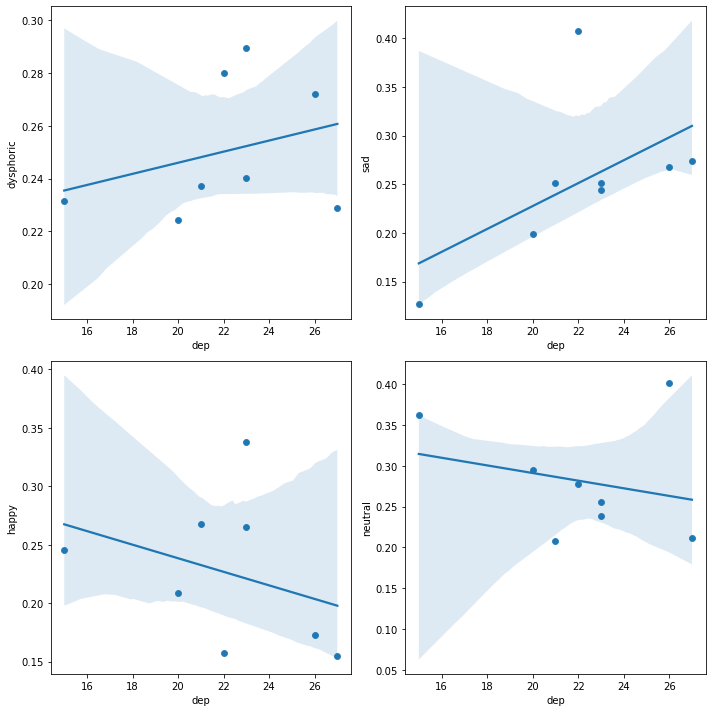

In [150]:
"""
Faces Dwell Time Ratio X Dep
"""

dep_result_ratio = {}
for i in data.participant_num.unique()[::-1]:
    dysphoric = [
        get_ratio(data, i, 0, 11),
        get_ratio(data, i, 0, 21),
        get_ratio(data, i, 2, 12),
        get_ratio(data, i, 2, 22),
        get_ratio(data, i, 3, 11),
        get_ratio(data, i, 3, 22),
        get_ratio(data, i, 4, 21),
        get_ratio(data, i, 4, 22),
                ]
    positive = [
        get_ratio(data, i, 0, 22),
        get_ratio(data, i, 1, 12),
        get_ratio(data, i, 2, 11),
        get_ratio(data, i, 3, 21),
        get_ratio(data, i, 4, 12),
    ]
    sad= [
        get_ratio(data, i, 0, 21),
        get_ratio(data, i, 1, 11),
        get_ratio(data, i, 2, 22),
        get_ratio(data, i, 3, 22),
        get_ratio(data, i, 4, 21),
    ]
    happy = positive
    neutral = [
        get_ratio(data, i, 0, 11),
        get_ratio(data, i, 1, 22),
        get_ratio(data, i, 2, 12),
        get_ratio(data, i, 3, 12),
        get_ratio(data, i, 4, 11),
    ]
    
    dep_result_ratio[7-i] = [
        sum(dysphoric) / len(dysphoric),
        sum(positive) / len(positive),
        sum(sad) / len(sad),
        sum(happy) / len(happy),
        sum(neutral) / len(neutral)
    ]

dep_ratio_df = pd.DataFrame.from_dict(dep_result_ratio, orient= 'index')
dep_ratio_df.columns = ['dysphoric', 'positive', 'sad', 'happy', 'neutral']
faces_dep_ratio_target = pd.concat([dep_ratio_df, target], axis = 1)
    
fig, axes = plt.subplots(2, 2, figsize = (10,10))

sns.scatterplot(x='dep', y='dysphoric', data = faces_dep_ratio_target, ax = axes[0, 0])
sns.scatterplot(x='dep', y='sad', data = faces_dep_ratio_target, ax = axes[0, 1])
sns.scatterplot(x='dep', y='happy', data = faces_dep_ratio_target, ax = axes[1, 0])
sns.scatterplot(x='dep', y='neutral', data = faces_dep_ratio_target, ax = axes[1, 1])

sns.regplot(x='dep', y='dysphoric', data = faces_dep_ratio_target, ax = axes[0, 0])
sns.regplot(x='dep', y='sad', data = faces_dep_ratio_target, ax = axes[0, 1])
sns.regplot(x='dep', y='happy', data = faces_dep_ratio_target, ax = axes[1, 0])
sns.regplot(x='dep', y='neutral', data = faces_dep_ratio_target, ax = axes[1, 1])

# ax[0, 0].scatter(dep, dysphoric)
# ax[0, 1].scatter(dep, sad)
# ax[1, 0].scatter(dep, happy)
# ax[1, 1].scatter(dep, neutral)

# ax[0, 0].set_title("Dep * Dysphoric")
# ax[0, 1].set_title("Dep * Sad")
# ax[1, 0].set_title("Dep * Happy")
# ax[1, 1].set_title("Dep * Neutral")

fig.tight_layout()

plt.show()

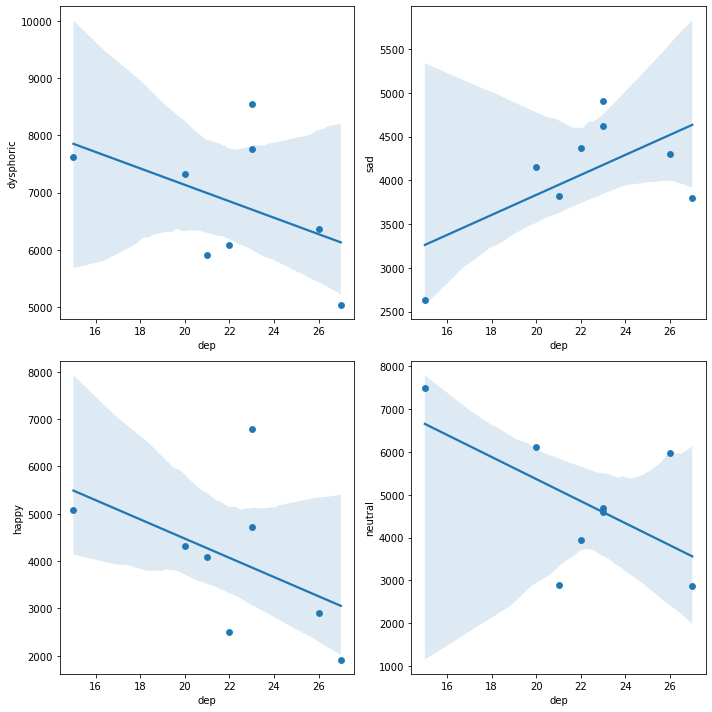

In [149]:
"""
Faces Dwell Time Abs X Dep
"""

dep_result_sum = {}
for i in data.participant_num.unique()[::-1]:
    dysphoric = [
        get_time(data, i, 0, 11),
        get_time(data, i, 0, 21),
        get_time(data, i, 2, 12),
        get_time(data, i, 2, 22),
        get_time(data, i, 3, 11),
        get_time(data, i, 3, 22),
        get_time(data, i, 4, 21),
        get_time(data, i, 4, 22),
                ]
    positive = [
        get_time(data, i, 0, 22),
        get_time(data, i, 1, 12),
        get_time(data, i, 2, 11),
        get_time(data, i, 3, 21),
        get_time(data, i, 4, 12),
    ]
    sad= [
        get_time(data, i, 0, 21),
        get_time(data, i, 1, 11),
        get_time(data, i, 2, 22),
        get_time(data, i, 3, 22),
        get_time(data, i, 4, 21),
    ]
    happy = positive
    neutral = [
        get_time(data, i, 0, 11),
        get_time(data, i, 1, 22),
        get_time(data, i, 2, 12),
        get_time(data, i, 3, 12),
        get_time(data, i, 4, 11),
    ]
    
    dep_result_sum[7-i] = [sum(dysphoric), sum(positive), sum(sad), sum(happy), sum(neutral)]
    
dep_sum_df = pd.DataFrame.from_dict(dep_result_sum, orient= 'index')
dep_sum_df.columns = ['dysphoric', 'positive', 'sad', 'happy', 'neutral']
faces_dep_sum_target = pd.concat([dep_sum_df, target], axis = 1)

fig, axes = plt.subplots(2, 2, figsize = (10,10))

sns.scatterplot(x='dep', y='dysphoric', data = faces_dep_sum_target, ax = axes[0, 0])
sns.scatterplot(x='dep', y='sad', data = faces_dep_sum_target, ax = axes[0, 1])
sns.scatterplot(x='dep', y='happy', data = faces_dep_sum_target, ax = axes[1, 0])
sns.scatterplot(x='dep', y='neutral', data = faces_dep_sum_target, ax = axes[1, 1])

sns.regplot(x='dep', y='dysphoric', data = faces_dep_sum_target, ax = axes[0, 0])
sns.regplot(x='dep', y='sad', data = faces_dep_sum_target, ax = axes[0, 1])
sns.regplot(x='dep', y='happy', data = faces_dep_sum_target, ax = axes[1, 0])
sns.regplot(x='dep', y='neutral', data = faces_dep_sum_target, ax = axes[1, 1])

# ax[0, 0].scatter(dep, dysphoric)
# ax[0, 1].scatter(dep, sad)
# ax[1, 0].scatter(dep, happy)
# ax[1, 1].scatter(dep, neutral)

# ax[0, 0].set_title("Dep * Dysphoric")
# ax[0, 1].set_title("Dep * Sad")
# ax[1, 0].set_title("Dep * Happy")
# ax[1, 1].set_title("Dep * Neutral")

fig.tight_layout()

plt.show()

<AxesSubplot:xlabel='anx', ylabel='happy'>

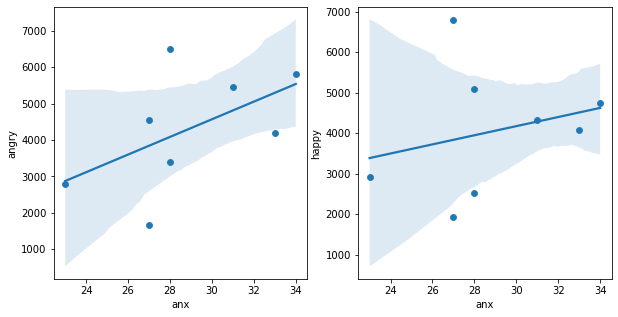

In [151]:
"""
Faces Dwell Time Abs X Anx
"""

anx_result_sum = {}
for i in data.participant_num.unique():
    angry = [
        get_time(data, i, 0, 11),
        get_time(data, i, 1, 21),
        get_time(data, i, 2, 12),
        get_time(data, i, 3, 11),
        get_time(data, i, 4, 22),
    ]
    
    happy = [
        get_time(data, i, 0, 22),
        get_time(data, i, 1, 12),
        get_time(data, i, 2, 11),
        get_time(data, i, 3, 21),
        get_time(data, i, 4, 12),
    ]
    
    anx_result_sum[7-i] = [sum(angry), sum(happy)]
    
    
anx_sum_df = pd.DataFrame.from_dict(anx_result_sum, orient= 'index')
anx_sum_df.columns = ['angry', 'happy']
faces_anx_sum_target = pd.concat([anx_sum_df, target], axis = 1)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

sns.scatterplot(x='anx', y='angry', data = faces_anx_sum_target, ax = axes[0])
sns.scatterplot(x='anx', y='happy', data = faces_anx_sum_target, ax = axes[1])

sns.regplot(x='anx', y='angry', data = faces_anx_sum_target, ax = axes[0])
sns.regplot(x='anx', y='happy', data = faces_anx_sum_target, ax = axes[1])

<AxesSubplot:xlabel='anx', ylabel='happy'>

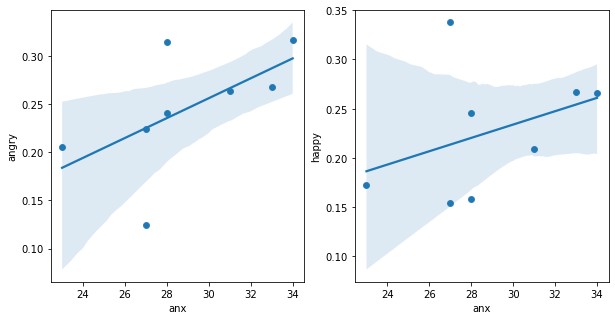

In [152]:
"""
Faces Dwell Time Ratio X Anx
"""

anx_result_ratio = {}
for i in data.participant_num.unique():
    angry = [
        get_ratio(data, i, 0, 11),
        get_ratio(data, i, 1, 21),
        get_ratio(data, i, 2, 12),
        get_ratio(data, i, 3, 11),
        get_ratio(data, i, 4, 22),
    ]
    
    happy = [
        get_ratio(data, i, 0, 22),
        get_ratio(data, i, 1, 12),
        get_ratio(data, i, 2, 11),
        get_ratio(data, i, 3, 21),
        get_ratio(data, i, 4, 12),
    ]
    
    anx_result_ratio[7-i] = [sum(angry) / len(angry), sum(happy) / len(happy)]
    
    
anx_ratio_df = pd.DataFrame.from_dict(anx_result_ratio, orient= 'index')
anx_ratio_df.columns = ['angry', 'happy']
faces_anx_ratio_target = pd.concat([anx_ratio_df, target], axis = 1)

fig, axes = plt.subplots(1, 2, figsize = (10,5))

sns.scatterplot(x='anx', y='angry', data = faces_anx_ratio_target, ax = axes[0])
sns.scatterplot(x='anx', y='happy', data = faces_anx_ratio_target, ax = axes[1])

sns.regplot(x='anx', y='angry', data = faces_anx_ratio_target, ax = axes[0])
sns.regplot(x='anx', y='happy', data = faces_anx_ratio_target, ax = axes[1])

In [157]:
data = pd.read_csv("kirbs_data_8_identification_output.csv", index_col = 0)

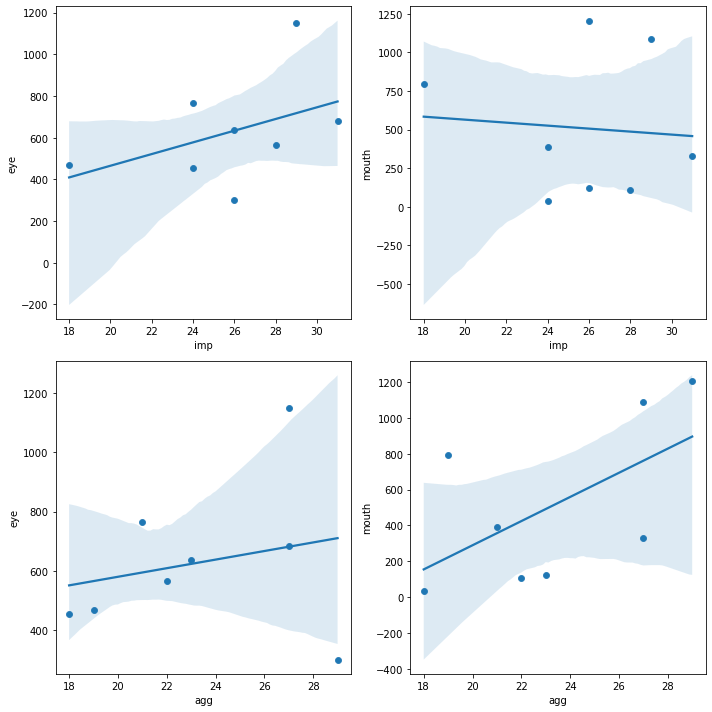

In [175]:
"""
Identification Dwell Time X Agg & Imp [All]
"""

abs_dwell_time = {}

for i in data.participant_num.unique():
    abs_dwell_time_eye_sum = data[(data['participant_num'] == i)]['abs_dwell_eye'].sum()
    abs_dwell_time_mouth_sum = data[(data['participant_num'] == i)]['abs_dwell_mouth'].sum()
    
    abs_dwell_time[7-i] = [abs_dwell_time_eye_sum, abs_dwell_time_mouth_sum]
    
abs_sum_df = pd.DataFrame.from_dict(abs_dwell_time, orient= 'index')
abs_sum_df.columns = ['eye', 'mouth']
abs_sum_target = pd.concat([abs_sum_df, target], axis = 1)

fig, axes = plt.subplots(2, 2, figsize = (10,10))

sns.scatterplot(x='imp', y='eye', data = abs_sum_target, ax = axes[0, 0])
sns.scatterplot(x='imp', y='mouth', data = abs_sum_target, ax = axes[0, 1])
sns.scatterplot(x='agg', y='eye', data = abs_sum_target, ax = axes[1, 0])
sns.scatterplot(x='agg', y='mouth', data = abs_sum_target, ax = axes[1, 1])

sns.regplot(x='imp', y='eye', data = abs_sum_target, ax = axes[0, 0])
sns.regplot(x='imp', y='mouth', data = abs_sum_target, ax = axes[0, 1])
sns.regplot(x='agg', y='eye', data = abs_sum_target, ax = axes[1, 0])
sns.regplot(x='agg', y='mouth', data = abs_sum_target, ax = axes[1, 1])

# ax[0, 0].scatter(dep, dysphoric)
# ax[0, 1].scatter(dep, sad)
# ax[1, 0].scatter(dep, happy)
# ax[1, 1].scatter(dep, neutral)

# ax[0, 0].set_title("Dep * Dysphoric")
# ax[0, 1].set_title("Dep * Sad")
# ax[1, 0].set_title("Dep * Happy")
# ax[1, 1].set_title("Dep * Neutral")

fig.tight_layout()

plt.show()

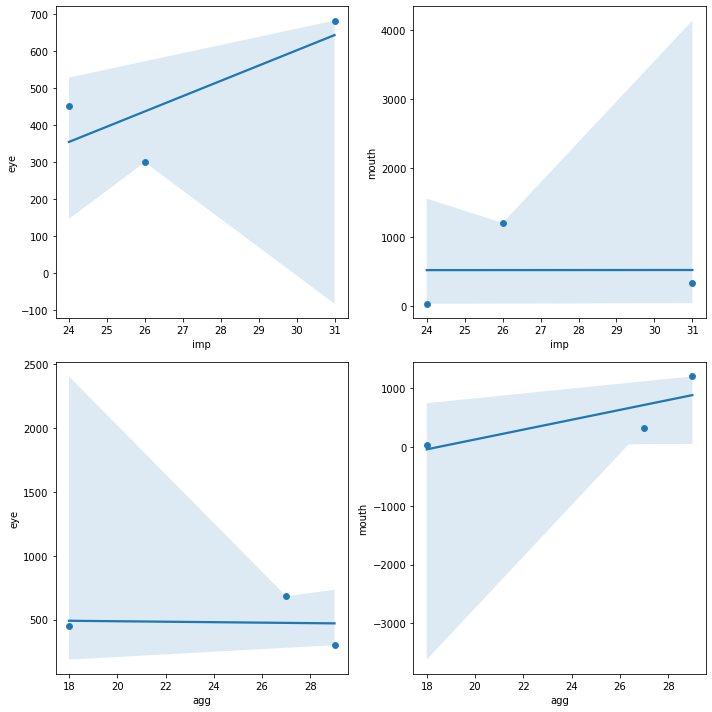

In [174]:
"""
Identification Dwell Time X Agg & Imp [n = 3]
"""

abs_dwell_time = {}

for i in data.participant_num.unique():
    abs_dwell_time_eye_sum = data[(data['participant_num'] == i)]['abs_dwell_eye'].sum()
    abs_dwell_time_mouth_sum = data[(data['participant_num'] == i)]['abs_dwell_mouth'].sum()
    
    abs_dwell_time[7-i] = [abs_dwell_time_eye_sum, abs_dwell_time_mouth_sum]

abs_sum_df = pd.DataFrame.from_dict(abs_dwell_time, orient= 'index')
abs_sum_df.columns = ['eye', 'mouth']
abs_sum_target = pd.concat([abs_sum_df, target], axis = 1)

abs_sum_target = abs_sum_target.iloc[[0, 6, 7], :]

fig, axes = plt.subplots(2, 2, figsize = (10,10))

sns.scatterplot(x='imp', y='eye', data = abs_sum_target, ax = axes[0, 0])
sns.scatterplot(x='imp', y='mouth', data = abs_sum_target, ax = axes[0, 1])
sns.scatterplot(x='agg', y='eye', data = abs_sum_target, ax = axes[1, 0])
sns.scatterplot(x='agg', y='mouth', data = abs_sum_target, ax = axes[1, 1])

sns.regplot(x='imp', y='eye', data = abs_sum_target, ax = axes[0, 0])
sns.regplot(x='imp', y='mouth', data = abs_sum_target, ax = axes[0, 1])
sns.regplot(x='agg', y='eye', data = abs_sum_target, ax = axes[1, 0])
sns.regplot(x='agg', y='mouth', data = abs_sum_target, ax = axes[1, 1])

# ax[0, 0].scatter(dep, dysphoric)
# ax[0, 1].scatter(dep, sad)
# ax[1, 0].scatter(dep, happy)
# ax[1, 1].scatter(dep, neutral)

# ax[0, 0].set_title("Dep * Dysphoric")
# ax[0, 1].set_title("Dep * Sad")
# ax[1, 0].set_title("Dep * Happy")
# ax[1, 1].set_title("Dep * Neutral")

fig.tight_layout()

plt.show()

In [184]:
"""
Identification Dwell Time X Agg & Imp [All] Corr table
"""

abs_sum_target.corr(method='pearson')

,eye,mouth,anx,dep,imp,agg
eye,1.000000,0.128853,-0.817051,0.449588,0.432067,0.227576
mouth,0.128853,1.000000,-0.235191,0.203859,-0.083135,0.589551
anx,-0.817051,-0.235191,1.000000,-0.339721,-0.052630,-0.105849
dep,0.449588,0.203859,-0.339721,1.000000,-0.259723,-0.183581
imp,0.432067,-0.083135,-0.052630,-0.259723,1.000000,0.686209
agg,0.227576,0.589551,-0.105849,-0.183581,0.686209,1.000000


<AxesSubplot:>

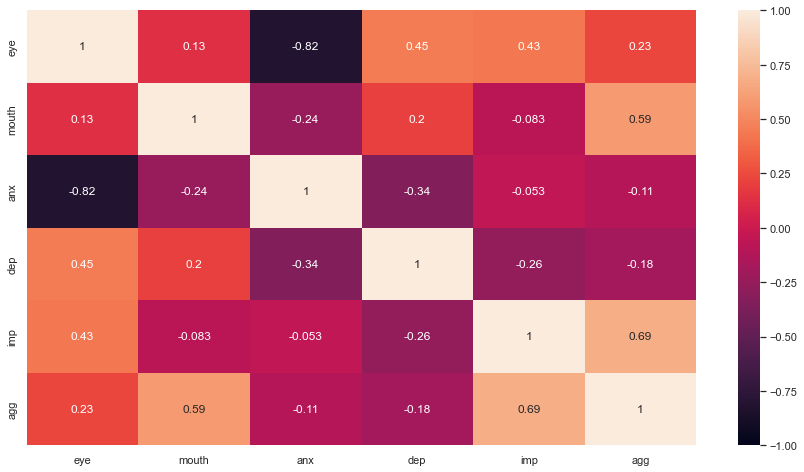

In [186]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(abs_sum_target.corr(method='pearson'), vmin=-1, vmax=1, annot=True)

In [182]:
"""
Faces Dwell Time Ratio X Dark Side
"""

faces_dep_ratio_target.corr(method='pearson')

,dysphoric,positive,sad,happy,neutral,anx,dep,imp,agg
dysphoric,1.000000,-0.143169,0.580257,-0.143169,0.203677,0.024966,0.303399,-0.128706,-0.071115
positive,-0.143169,1.000000,-0.435042,1.000000,-0.273486,0.379496,-0.335137,0.414824,0.317148
sad,0.580257,-0.435042,1.000000,-0.435042,-0.275026,-0.133171,0.556073,-0.807611,-0.379061
happy,-0.143169,1.000000,-0.435042,1.000000,-0.273486,0.379496,-0.335137,0.414824,0.317148
neutral,0.203677,-0.273486,-0.275026,-0.273486,1.000000,-0.550343,-0.250076,0.445019,0.244210
anx,0.024966,0.379496,-0.133171,0.379496,-0.550343,1.000000,-0.339721,-0.052630,-0.105849
dep,0.303399,-0.335137,0.556073,-0.335137,-0.250076,-0.339721,1.000000,-0.259723,-0.183581
imp,-0.128706,0.414824,-0.807611,0.414824,0.445019,-0.052630,-0.259723,1.000000,0.686209
agg,-0.071115,0.317148,-0.379061,0.317148,0.244210,-0.105849,-0.183581,0.686209,1.000000


<AxesSubplot:>

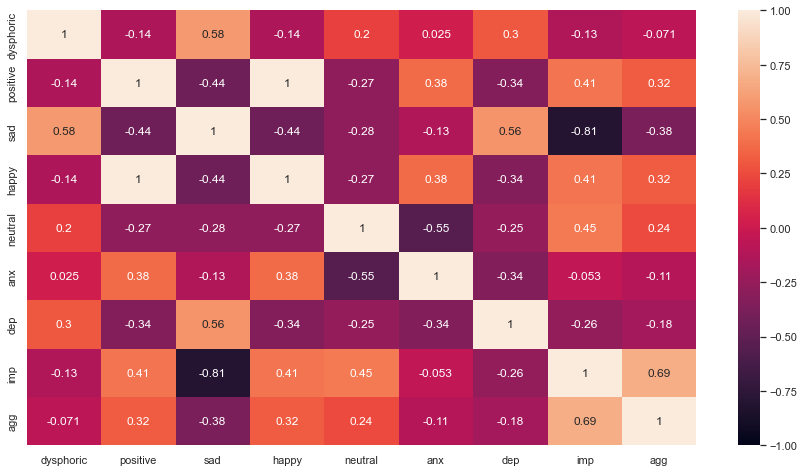

In [187]:
sns.heatmap(faces_dep_ratio_target.corr(method='pearson'), vmin=-1, vmax=1, annot=True)

In [183]:
"""
Faces Dwell Time Abs X Dark Side
"""

faces_dep_sum_target.corr(method = 'pearson')

,dysphoric,positive,sad,happy,neutral,anx,dep,imp,agg
dysphoric,1.000000,0.789810,0.178179,0.789810,0.576973,0.354539,-0.456864,0.452568,-0.055428
positive,0.789810,1.000000,0.139778,1.000000,0.379126,0.257608,-0.479279,0.438345,0.182300
sad,0.178179,0.139778,1.000000,0.139778,-0.373208,0.031912,0.614303,-0.384256,-0.408253
happy,0.789810,1.000000,0.139778,1.000000,0.379126,0.257608,-0.479279,0.438345,0.182300
neutral,0.576973,0.379126,-0.373208,0.379126,1.000000,-0.264027,-0.588474,0.549969,0.109364
anx,0.354539,0.257608,0.031912,0.257608,-0.264027,1.000000,-0.339721,-0.052630,-0.105849
dep,-0.456864,-0.479279,0.614303,-0.479279,-0.588474,-0.339721,1.000000,-0.259723,-0.183581
imp,0.452568,0.438345,-0.384256,0.438345,0.549969,-0.052630,-0.259723,1.000000,0.686209
agg,-0.055428,0.182300,-0.408253,0.182300,0.109364,-0.105849,-0.183581,0.686209,1.000000


<AxesSubplot:>

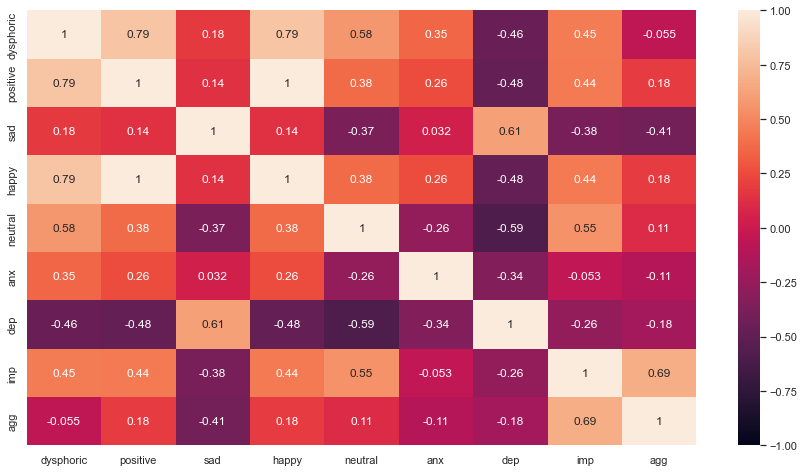

In [188]:
sns.heatmap(faces_dep_sum_target.corr(method = 'pearson'), vmin=-1, vmax=1, annot=True)